# Outline

## 1. Introduction to Tensorflow
## 2. Simple regression
## 3. CNN mnist classification

### 1. Introduction to Tensorflow 

A TensorFlow model consists of the following parts:

* Placeholder variables used for inputting **data** to the model.
* **Parameters** (w) that are going to be optimized so as to make the neural network perform better.
* A so-called cost-measure or **loss-function** (L) that can be used to guide the optimization of the variables.
* An **optimization method** which updates the variables (e.g., graident descent).

<img src="https://miro.medium.com/max/525/1*Bjh6q72YAx9RD-z4i3h3pA@2x.png" alt="nn" style="width: 200px;"/>

TensorFlow can automatically calculate the gradients that are needed to optimize the variables (parameters) of the model so as to make it perform better. This is because the model is a combination of simple mathematical expressions so the gradient can be calculated using the chain-rule for derivatives.

TensorFlow can also take advantage of multi-core CPUs as well as GPUs - and Google has even built special chips just for TensorFlow which are called TPUs (Tensor Processing Units) and are even faster than GPUs.

<https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9>

In addition, the TensorFlow may also contain various debugging statements e.g. for logging data to be displayed using TensorBoard, which is not covered in this tutorial.

## 2. Simple regression

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}

Based on <https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/301_simple_regression.py>

In [2]:
tf.__version__

'1.15.0'

### Set the seed to obtain reproducible results

In [3]:
tf.set_random_seed(1)
np.random.seed(1)

### Data preparation

In [4]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

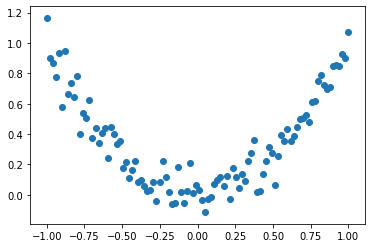

In [5]:
# plot data
plt.scatter(x, y)
plt.show()

### Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

### Placeholder

In [6]:
input_x = tf.placeholder(tf.float32, [None, 1])      # input x
#input_x = tf.placeholder(tf.float32, [100, 1])     
output_y = tf.placeholder(tf.float32, [None, 1])     # input y
#output_y = tf.placeholder(tf.float32, [100, 1])     

### Parameters (layers)

In [7]:
# neural network layers
h1 = tf.layers.dense(inputs=input_x, units=10, activation=tf.nn.relu, name='h1')   # hidden layer
h2 = tf.layers.dense(inputs=h1, units=10, activation=tf.nn.relu, name='h2')        # hidden layer
output = tf.layers.dense(inputs=h2, units=1, name='output')                        # output layer

### Loss function

In [8]:
loss = tf.losses.mean_squared_error(output_y, output)   # compute cost

### Optimization method

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

### Count total parameters

In [10]:
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    print(variable)
    shape = variable.get_shape()
    print(shape)
    #print(len(shape))
    variable_parameters = 1
    for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)

<tf.Variable 'h1/kernel:0' shape=(1, 10) dtype=float32_ref>
(1, 10)
10
<tf.Variable 'h1/bias:0' shape=(10,) dtype=float32_ref>
(10,)
10
<tf.Variable 'h2/kernel:0' shape=(10, 10) dtype=float32_ref>
(10, 10)
100
<tf.Variable 'h2/bias:0' shape=(10,) dtype=float32_ref>
(10,)
10
<tf.Variable 'output/kernel:0' shape=(10, 1) dtype=float32_ref>
(10, 1)
10
<tf.Variable 'output/bias:0' shape=(1,) dtype=float32_ref>
(1,)
1
141


### Create TensorFlow session

Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph.

In [11]:
sess = tf.Session()                                 # control training and others

### Initialize variables

The variables for the TensorFlow graph must be initialized before we start optimizing them.

In [12]:
sess.run(tf.global_variables_initializer())         # initialize var in graph

### Training the model

- Epoch: each time the algorithm has seen all data samples in the dataset, an epoch has completed.
- Iteration: every time you pass a batch of data through the model, you completed an iteration. 

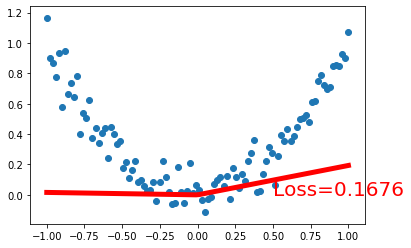

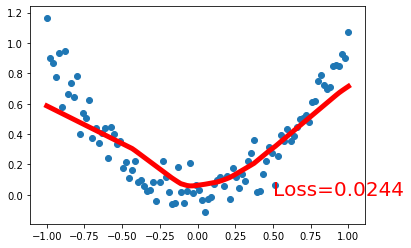

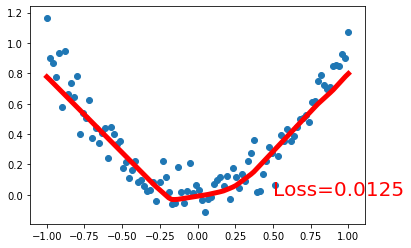

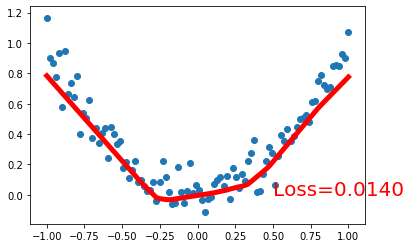

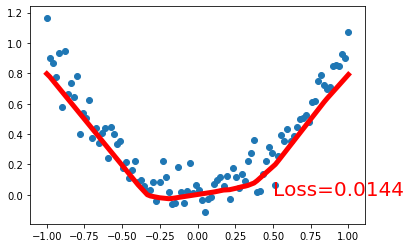

In [13]:
#train_op = optimizer.minimize(loss)
# loss = tf.losses.mean_squared_error(output_y, output)
for iteration in range(100):
    # train and net output
    _, l, pred = sess.run([train_op, loss, output], feed_dict={input_x: x, output_y: y})
    if iteration % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()